## **Historical Perspectives on Current Economic Issues: Big Data and Applications**
### *AI/ML for language and vision*

Torben Skov Dyg Johansen (tsdj@sam.sdu.dk, tsdj@rooftop-analytics.com)
Assistant Professor of Econometrics and Data Science at SDU and Data Scientist at Rooftop Analytics
https://torbensdjohansen.github.io/

Christian Vedel (christian-vs@sam.sdu.dk)
Assistant Professor of Economic History
https://sites.google.com/view/christianvedel 

# Today
- Taking the plunch into using some of the tools
- Balance between showing *what* can be done and *how* to do it. More towards *how*. 
- First bit should be fine for everyone to follow along, but difficulty increases througout the day
- Some of it will be hard, but this is an advanced class

## Plan:
1. **Off-shelf-models:** How to run advanced ML pipelines for text and image analysis in a couple lines of code
2. **Tokens and embedding space:** A conceptual framework to understand machine learning
3. **Introduction to OccCANINE:** How to use it and how to build something similar (a neural network for text classication)
4. **Transcription:** How to run transcription on scanned documents

# Python

- The single most important language for machine learning
- R can do *some* stuff. But not everything we show you today
- Easy language

![Languages](Figures/languages.png)

![Frameworks](Figures/frameworks.png)

## Getting started with Python

### Colab
- We will use google colab: https://colab.research.google.com/ 

### Proper setup
- Install anaconda
- Make environment `conda create --name my_env`
- `conda install spyder`
- Find *plenty* via google

### Programming logic
- Play "The Farmer Was Replaced": https://store.steampowered.com/app/2060160/The_Farmer_Was_Replaced/ 

<div style="display: flex; align-items: center;">
    <img src="https://huggingface.co/favicon.ico" alt="HuggingFace Logo" style="height: 40px; margin-right: 10px;">
    <h1 style="margin: 0;">HuggingFace</h1>
</div>

- HuggingFace is a platform for sharing machine learning models
- Most of the most advanced pretrained models are available here
- You can use the *off the shelf* or finetune them. Plenty of guidance available



### Exercise
- Try navigating to [HuggingFace.co](https://huggingface.co/)
- Look for a model for one of the following tasks: Image Classification, Text Classification, Zero-Shot Classificaiton, Translation, Sentence Similarity
- Take a picture of yourself (or some on the internet) and try this tool: [huggingface.co/spaces/schibsted-presplit/facial_expression_classifier](https://huggingface.co/spaces/schibsted-presplit/facial_expression_classifier)

## `pipeline`
- You can interact with many of these models using the `pipeline` interface of the `transformers` library
- You make an *instance* of a model buy calling `pipeline(task = "...")`
- You can find an overview of tasks here: [huggingface.co/docs/transformers/main/en/quicktour#pipeline](https://huggingface.co/docs/transformers/main/en/quicktour#pipeline)

<h1> Demonstration 1: Vision </h1>
<div style="overflow: hidden;">
    <div style="float: left; width: 70%;">
        <ul>
        <li>Automatic image description</li>
        <li>Automatic image object detection</li>
        </ul>
    </div>
    <div style="float: right; text-align: center; width: 30%;">
        <img src="Figures/arkivdk7055378.png" alt="Arkiv.dk"/>
        <br/>
        <span style="font-size: small;">Picture from <a href="https://arkiv.dk/vis/7055378">arkiv.dk</a></span>
    </div>
</div>

## Demo 1.1: Automatic caption

In [ ]:
from transformers import pipeline
model = pipeline(
    task="image-to-text", 
    model = "Salesforce/blip-image-captioning-base"
)

results = model("Figures/arkivdk7055378.png")

In [3]:
print(results)

[{'generated_text': 'two men sitting on a chair in front of a wall'}]


## Demo 1.2: Object detection

In [ ]:
from transformers import pipeline

model = pipeline("object-detection", model = "facebook/detr-resnet-50")
results = model("Figures/arkivdk7055378.png")
# ... add a bit of code to draw the objects found

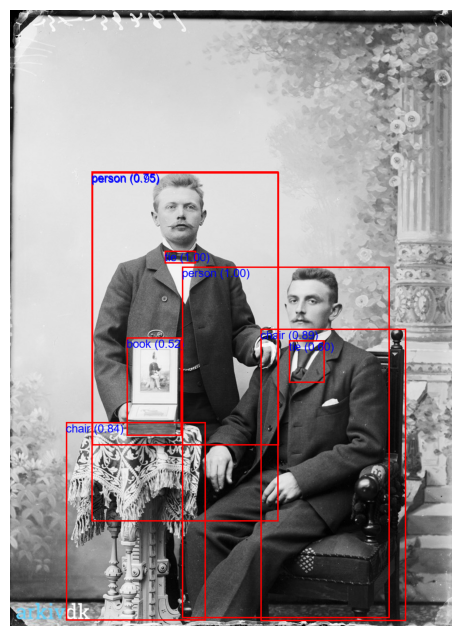

In [3]:
# Not shown in presentation
from utils import draw_picture # Custom functon
draw_picture(results, "Figures/arkivdk7055378.png", save_path="Figures/arkivdk7055378_annotated.png")

<img src="Figures/arkivdk7055378_annotated.png" alt="Annotated" style="height:600px;">

![Images](Figures/voth_yanagizawa-drott_2024.PNG)

![Images](Figures/voth_yanagizawa-drott_2024_fig4.PNG)

Find the working paper here: https://www.jvoth.com/images_july_24.pdf

# Demonstration 2: Natural Language Processing



### About NLP
- Natural Language Processesing used to be based on *Bag of Words* (BoW) and *rule-based* methods informed by Grammar and Lingustics
- The old approach still has some merit (simple topic models, very fast compute in financial applications, etc.)
- Instead we use *masked* tranformer language models trained on next token prediction
  + Justification: *It turns out, that you need to implicitly understand language to predict it*

### Language Models: Quick and dirty tour of the landscape
- Old models: Based on LSTM
- New models: Based on transformers
- Medium Language Models: 50m to 1b parameters
- Large Language Models: >1b parameters

## Demo 2.1: Sentiment analysis

In [4]:
from transformers import pipeline
classifier = pipeline(
    task = "sentiment-analysis", 
    model = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"
)
result = classifier("It is a lot of fun to learn advanced ML stuff.")

In [5]:
print(result)

[{'label': 'POSITIVE', 'score': 0.9997534155845642}]


## Demo 2.2: Named Entities Recognition

In [ ]:
from transformers import pipeline
model = pipeline(task = "ner", model = "dslim/bert-base-NER")
result = model(
    """
    Mr. Edward Jameson, born on October 15, 1867, in Concord, Massachusetts, 
    is a gentleman of notable accomplishments. He received his early 
    education at the local academy and graduated with honors from Harvard 
    College in 1888. Pursuing a career in law, he quickly rose to prominence 
    through his sagacity and dedication."
    """
)

In [6]:
from utils import print_ner

In [7]:
print_ner(result) # Custom function to print

B-PER: Edward; Probability: 0.998
I-PER: Jameson; Probability: 0.998
B-LOC: Concord; Probability: 0.991
B-LOC: Massachusetts; Probability: 0.999
B-ORG: Harvard; Probability: 0.998
I-ORG: College; Probability: 0.997


## Demo 2.3: Translation

In [6]:
from transformers import pipeline

translator = pipeline("translation_en_to_fr", model = "google-t5/t5-base")

text = "Hello, do you like machine learning and economic history?"

results = translator(text)

In [7]:
for result in results:
    print(f"Translated Text: {result['translation_text']}")

Translated Text: Bonjour, aimez-vous l'apprentissage automatique et l'histoire économique ?


## Demo 2.3: Text generation from Large Language Model

In [ ]:
from transformers import pipeline
import torch

model = pipeline(
    task = "text-generation", 
    model = 'HuggingFaceH4/zephyr-7b-beta', 
    torch_dtype=torch.bfloat16, 
    device_map='auto',
    ) # facebook/opt-125m
result = model(
    "The technical aspects of economic history", 
    max_length=50, 
    truncation=True,
    )

In [10]:
print(result)

[{'generated_text': 'The technical aspects of economic history, such as the study of prices, wages, and interest rates, are also important in understanding the economic development of a region.\n\nIn summary, economic history is a multidisciplinary field that combines'}]


### Extension: You can also provide context

In [11]:
messages = [
    {
        "role": "system",
        "content": """
        You are a friendly econometrician who's interested in advanced 
        statistical techniques for Economic History. You want people to 
        understand the importance of advanced methods.
        """,
    },
    {
        "role": "user", 
        "content": """"
        Can we do good economic history research without all the 
        technicalities?
        """
    },
]
prompt = model.tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
outputs = model(
    prompt, max_new_tokens=128, do_sample=True, temperature=0.7, 
    top_k=10, top_p=0.95
)

In [12]:
print(outputs[0]["generated_text"])

<|system|>

        You are a friendly econometrician who's interested in advanced 
        statistical techniques for Economic History. You want people to 
        understand the importance of advanced methods.
        </s>
<|user|>
"
        Can we do good economic history research without all the 
        technicalities?
        </s>
<|assistant|>
While it's true that some economic history research can be done with simpler statistical methods, advanced techniques offer several benefits that can enhance the accuracy and reliability of historical analyses. Here are a few reasons why advanced methods are important:

1. Dealing with complex data: Historical data can be messy and incomplete, with missing values, outliers, and other irregularities. Advanced statistical techniques, such as time-series analysis, panel data models, and Bayesian methods, can help econometricians handle these challenges and draw more reliable conclusions.

2. Accounting for structural changes: Historical econo

## Exercise: 
### Running advanced ML model yourself

You are tasked with running an automated and scalable analyisis *Notes from the Underground* by Dostoevsky

- Go to to [colab.research.google.com/drive/1YmzV2A40B3KsnTycavg2I9IxLk4DS1g-?usp=sharing](https://colab.research.google.com/drive/1YmzV2A40B3KsnTycavg2I9IxLk4DS1g-?usp=sharing)
- Copy the notebook and do the exercises

### Outline

#### Language
1. Tokenization: Representing text as numbers
1. Text embeddings
1. Neural networks for text data
1. Text classification from scratch

#### Vision
1. Document classification
1. Segmentations
1. Handwritten text recognition
1. Application: Copenhagen Infant Health Visitor Records

# Tokenization

**Computers only like numbers**: We need to somehow represent text as numbers

*We essentially do this the same way we handle categorical variables in regressions*

## Tokenizing a sentence

Tokenization works by building a dictionary for each word (or more generally token, it could be the sub-word or even character level).

For example, we may build the following dictionary:

In [13]:
tokenization_dict = {
    'the': 0,
    'cat': 1,
    'sat': 2,
    'on': 3,
    'mat': 4,
}

example_text = 'the cat sat on the mat'
tokenized_text = [tokenization_dict[word] for word in example_text.split()]
print(tokenized_text)

[0, 1, 2, 3, 0, 4]


## One-hot encoding

It makes little sense to think of separate words as lying on a continuous scale - and thus the numbers on the previous slide should be thought of as representing a categorical variable

As with using dummies in regressions, we now expand this categorial variable to a number of different 0/1 variables, which we call one-hot encoding

In [14]:
import torch

one_hot_encoded = torch.nn.functional.one_hot(torch.tensor(tokenized_text))
print(one_hot_encoded)

tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1]])


This matrix has five columns, as we have a dictionary with five unique words, and six rows, as we have a sentence consisting of six words (of which two are the same)

If we then estimated a linear model using OLS, we could make our preditions like so

In [15]:
betas = torch.tensor([1, 2, 3, 5, 9])

one_hot_encoded @ betas

tensor([1, 2, 3, 5, 1, 9])

Typically, a neural network will consists of a series of such matrix multiplications followed by some non-linearity

**Note**: It's quite inefficient to perform the above matrix multiplication, as the first matrix is *sparse* - and in practice, we'd implement this using a lookup

In [16]:
betas_lookup = dict(zip(tokenization_dict.values(), betas))
torch.tensor([betas_lookup[token] for token in tokenized_text])

tensor([1, 2, 3, 5, 1, 9])

**Note**: Often, we'll associate a *vector* (rather than just one number) with each token

# Text embeddings

One-hot encoding is *sparse*. 
This is particularly true if there are many classes, and working with language, over 100,000 classes is not uncommon

However, words are *related*, and we can often store them much more efficiently. 
Embedding is one such way, in which a sparse vector is transformed to a (often much lower dimensional) non-sparse/dense vector. 
In this more dense space, we often see that words such as "father" and "mother" might be closer to each other than to "Italy"

For a problem with n words (or tokens, in the general case) and an embedding dimension k, the embedding function is a function $f: \{0, 1\}^n \rightarrow \mathbb{R}^k$

As such, an embedding is "just" a lookup table, "looking up" *k* real numbers for each word

### Continuing our one-hot example

Recall our earlier one-hot example with a vocabulary consisting of five words (leading to each word being represented by a 5-dimensional sparse vector)

In [17]:
tokenization_dict

{'the': 0, 'cat': 1, 'sat': 2, 'on': 3, 'mat': 4}

Suppose we instead of creating an $n$-by-5 dimensional sparse vector ($n = $ length of sentence) creates an $n$-by-2 dimensional dense vector

In [18]:
import numpy as np

embedding_lookup = {
    0: (0.5, 0.1),
    1: (0.3, 0.9),
    2: (1.2, -1.2),
    3: (0.7, 2.3),
    4: (3.2, 1.1),
}

### Continuing our one-hot example

We can now use our embedding table to encode our sentence as an $n$-by-2 dimensional matrix (rather than $n$-by-6)

In [19]:
np.array([embedding_lookup[token] for token in tokenized_text])

array([[ 0.5,  0.1],
       [ 0.3,  0.9],
       [ 1.2, -1.2],
       [ 0.7,  2.3],
       [ 0.5,  0.1],
       [ 3.2,  1.1]])

This works phenomenally well, the reason of which has to do with how words are related.
Intuitively, some words are "closer" to each other than others, such as father and mother being more close to each other than either is to hospital

### A real example

[GloVe](https://nlp.stanford.edu/projects/glove/) is a commonly used pre-trained embedding table.
Let's take a look at some 50-dimensional vector representations of 400,000 words (or word-pieces) and how they are related

In [20]:
import torchtext

vocab = torchtext.vocab.GloVe(name='6B', dim=50)

We will start by studying the placement of father and mother in relation to each other (here, first 5 dimensions for readability)

In [21]:
vocab.vectors[vocab.stoi['father']][:5]

tensor([ 0.0955,  0.7042, -0.4078, -0.8084,  1.2560])

In [22]:
vocab.vectors[vocab.stoi['mother']][:5]

tensor([ 0.4336,  1.0727, -0.6196, -0.8068,  1.2519])

### A real example

Intuitively, we would expect that if we subtract "man" from "father", and then add "woman", we should end up with "mother".
Let us see this is practice

In [23]:
embedding_father = vocab.vectors[vocab.stoi['father']]
embedding_man = vocab.vectors[vocab.stoi['man']]
embedding_woman = vocab.vectors[vocab.stoi['woman']]

qvec = embedding_father - embedding_man + embedding_woman
qvec[:5]

tensor([ 0.0084,  0.9224, -0.8176, -0.8477,  1.1528])

We will now calculate the distances between `qvec` and all embeddings, finding the associated word that lies closest to `qvec`

In [24]:
distances = torch.sum((vocab.vectors - qvec) ** 2, dim=1)
closest = torch.argmin(distances)
closest_word = vocab.itos[closest]
closest_word

'mother'

### A real example

Let us try to visualize this movement in embedding space.
First, we'll simplify this to 2 dimensions so we can actually visualize it.
In this example, I will do this using [t-SNE](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) over the 10,000 most common words part of the [GloVe](https://nlp.stanford.edu/projects/glove/) vocabulary

We're simplifying a bit here for visualization purposes, but this is all real data

Let us draw the relevant vectors, including our vector additions and subtractions

*See below for details on $t$-SNE*

In [25]:
from sklearn.manifold import TSNE

def get_tsne_embeddings(
        embeddings: np.ndarray,
        dimensions: int = 2,
        ):
    assert 2 <= dimensions <= 3, dimensions

    tsne = TSNE(n_components=dimensions, random_state=0)

    tsne_embeddings = tsne.fit_transform(embeddings)

    # Scale vectors to uniform length (easier to visualize)
    lens = sum(tsne_embeddings[:, i] ** 2 for i in range(dimensions)) ** 0.5

    tsne_embeddings_s = tsne_embeddings.copy()
    tsne_embeddings_s[:, 0] /= lens
    tsne_embeddings_s[:, 1] /= lens

    if dimensions == 3:
        tsne_embeddings_s[:, 2] /= lens

    return tsne_embeddings, tsne_embeddings_s

In [26]:
# 2d t-SNE embeddings for 10,000 most common "words" (tokens)
embeddings_50d = np.array([vocab.vectors[i].numpy() for i in range(10_000)])
tsne_embeddings, tsne_embeddings_s = get_tsne_embeddings(embeddings_50d, 2)

In [27]:
tsne_embeddings_s[vocab.stoi['father']]

array([0.6783404 , 0.73474777], dtype=float32)

In [28]:
tsne_embeddings_s[vocab.stoi['mother']]

array([0.6711474 , 0.74132395], dtype=float32)

### Father to mother in embedding space

<div id="image-container-1" style="width: 100%; margin: auto;">
    <img src="./figs/father-to-mother-1.png" style="width: 100%; position: absolute; opacity: 1;" class="fade-image-1">
    <img src="./figs/father-to-mother-2.png" style="width: 100%; position: absolute; opacity: 0;" class="fade-image-1">
    <img src="./figs/father-to-mother-3.png" style="width: 100%; position: absolute; opacity: 0;" class="fade-image-1">
    <img src="./figs/father-to-mother-4.png" style="width: 100%; position: absolute; opacity: 0;" class="fade-image-1">
</div>

<script>
let currentIndex1 = 0;
const images1 = document.querySelectorAll('.fade-image-1');
const fadeInterval1 = 3000;

function fadeImages1() {
    images1.forEach((img, index) => {
        img.style.opacity = index === currentIndex1 ? 1 : 0;
    });
    currentIndex1 = (currentIndex1 + 1) % images1.length;
}

let fadeTimer1 = setInterval(fadeImages1, fadeInterval1);

const observer1 = new IntersectionObserver(entries => {
    entries.forEach(entry => {
        if (entry.isIntersecting) {
            clearInterval(fadeTimer1); // Stop any previous interval
            currentIndex1 = 0; // Reset to the first image
            fadeImages1(); // Show the first image immediately
            fadeTimer1 = setInterval(fadeImages1, fadeInterval1); // Restart interval
        }
    });
}, { threshold: 0.5 });

observer1.observe(document.querySelector('#image-container-1'));
</script>

<style>
    #image-container-1 {
        position: relative;
        height: 500px; /* Set the desired height */
    }

    .fade-image-1 {
        transition: opacity 1s ease-in-out;
    }
</style>

### Son to daughter in embedding space

<div id="image-container-2" style="width: 100%; margin: auto;">
    <img src="./figs/son-to-daughter-1.png" style="width: 100%; position: absolute; opacity: 1;" class="fade-image-2">
    <img src="./figs/son-to-daughter-2.png" style="width: 100%; position: absolute; opacity: 0;" class="fade-image-2">
    <img src="./figs/son-to-daughter-3.png" style="width: 100%; position: absolute; opacity: 0;" class="fade-image-2">
    <img src="./figs/son-to-daughter-4.png" style="width: 100%; position: absolute; opacity: 0;" class="fade-image-2">
</div>

<script>
let currentIndex2 = 0;
const images2 = document.querySelectorAll('.fade-image-2');
const fadeInterval2 = 3000;

function fadeImages2() {
    images2.forEach((img, index) => {
        img.style.opacity = index === currentIndex2 ? 1 : 0;
    });
    currentIndex2 = (currentIndex2 + 1) % images2.length;
}

let fadeTimer2 = setInterval(fadeImages2, fadeInterval2);

const observer2 = new IntersectionObserver(entries => {
    entries.forEach(entry => {
        if (entry.isIntersecting) {
            clearInterval(fadeTimer2); // Stop any previous interval
            currentIndex2 = 0; // Reset to the first image
            fadeImages2(); // Show the first image immediately
            fadeTimer2 = setInterval(fadeImages2, fadeInterval2); // Restart interval
        }
    });
}, { threshold: 0.5 });

observer2.observe(document.querySelector('#image-container-2'));
</script>

<style>
    #image-container-2 {
        position: relative;
        height: 500px;
    }

    .fade-image-2 {
        transition: opacity 1s ease-in-out;
    }
</style>

*Scroll down to see 50-dimensional calculation*

Intuitively, we would expect that if we subtract "man" from "son", and then add "woman", we should end up with "daugther".
Let us see this is practice

In [29]:
embedding_son = vocab.vectors[vocab.stoi['son']]
embedding_man = vocab.vectors[vocab.stoi['man']]
embedding_woman = vocab.vectors[vocab.stoi['woman']]

qvec = embedding_son - embedding_man + embedding_woman
qvec[:5]

tensor([ 0.1900,  1.1960, -0.5546, -0.5261,  1.0682])

We will now calculate the distances between `qvec` and all embeddings, finding the associated word that lies closest to `qvec`

In [30]:
distances = torch.sum((vocab.vectors - qvec) ** 2, dim=1)
closest = torch.argmin(distances)
closest_word = vocab.itos[closest]
closest_word

'daughter'

### Paris to(wards) Rome in embedding space

<div id="image-container-3" style="width: 100%; margin: auto;">
    <img src="./figs/paris-to-rome-1.png" style="width: 100%; position: absolute; opacity: 1;" class="fade-image-3">
    <img src="./figs/paris-to-rome-2.png" style="width: 100%; position: absolute; opacity: 0;" class="fade-image-3">
    <img src="./figs/paris-to-rome-3.png" style="width: 100%; position: absolute; opacity: 0;" class="fade-image-3">
    <img src="./figs/paris-to-rome-4.png" style="width: 100%; position: absolute; opacity: 0;" class="fade-image-3">
</div>

<script>
let currentIndex3 = 0;
const images3 = document.querySelectorAll('.fade-image-3');
const fadeInterval3 = 3000;

function fadeImages3() {
    images3.forEach((img, index) => {
        img.style.opacity = index === currentIndex3 ? 1 : 0;
    });
    currentIndex3 = (currentIndex3 + 1) % images3.length;
}

let fadeTimer3 = setInterval(fadeImages3, fadeInterval3);

const observer3 = new IntersectionObserver(entries => {
    entries.forEach(entry => {
        if (entry.isIntersecting) {
            clearInterval(fadeTimer3); // Stop any previous interval
            currentIndex3 = 0; // Reset to the first image
            fadeImages3(); // Show the first image immediately
            fadeTimer3 = setInterval(fadeImages3, fadeInterval3); // Restart interval
        }
    });
}, { threshold: 0.5 });

observer3.observe(document.querySelector('#image-container-3'));
</script>

<style>
    #image-container-3 {
        position: relative;
        height: 500px;
    }

    .fade-image-3 {
        transition: opacity 1s ease-in-out;
    }
</style>

*Scroll down to see 50-dimensional calculation. In this case, while it does not quite work in two dimensions, it works in 50 dimensions*

Intuitively, we would expect that if we subtract "france" from "paris", and then add "italy", we should end up with "rome".
Let us see this is practice

In [31]:
embedding_paris = vocab.vectors[vocab.stoi['paris']]
embedding_france = vocab.vectors[vocab.stoi['france']]
embedding_italy = vocab.vectors[vocab.stoi['italy']]

qvec = embedding_paris - embedding_france + embedding_italy
qvec[:5]

tensor([ 1.8746,  0.1050, -1.0362,  0.2511,  0.2243])

We will now calculate the distances between `qvec` and all embeddings, finding the associated word that lies closest to `qvec`

In [32]:
distances = torch.sum((vocab.vectors - qvec) ** 2, dim=1)
closest = torch.argmin(distances)
closest_word = vocab.itos[closest]
closest_word

'rome'

# Neural networks for text

We now know how to represent text as numerical data suitable for modelling. 
Our next objective is to learn *how* to model text data

One key observation is that text is somewhat similar to time series data, in that a clear *sequential* structure is present: The meaning of a word depends on its context, i.e., how it is embedded in a sentence

Modern approaches roughly falls into one of two categories
1. Recurrent neural networks (RNNs; "classical" approach)
1. Transformers (SOTA)

Let's take a look at RNNs

### A recurrent cell of a neural network

<img src="./figs/figure_6-9.png" alt="Drawing" style="width: 400px;"/>
Source: Deep Learning with Python by Francois Collet (ISBN10: 9781617294433)

We have not yet specified the type of recurrent connection, just that it has form

$y_t = f(x_t, y_{t - 1})$

We can think about an autoregressive linear model with covariates as one example

$y_t = \alpha y_{t - 1} + \beta f_t$

### Recurrent cells and unfolding

Usually, a recurrent neural network looks something like the image below - i.e., it has a "loop" where it feeds into itself (left). This can then be "unfolded" (right), in which way it looks more like a regular network, with an additional input and output ("hidden states").

<img src="./figs/Recurrent_neural_network_unfold.svg" alt="Drawing" style="width: 600px;"/>
Source: "fdeloche - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=60109157"

### Long-term dependencies

A weakness of the simple recurrent neural network is that it becomes very difficult to model long-term dependencies

To address this, different architectures have been developed, typically with the primary difference being that the output $y_t$ is no longer passed on, but instead a "hidden state" is passed along

This makes modelling long-term dependencies *much* easier, as we no longer have to rely on our output being the sole information we pass along to the next step

The most commonly used architectures/"layers" are
1. Long short-term memory (LSTM, [paper](https://ieeexplore.ieee.org/abstract/document/6795963))
1. Gated recurrent unit (GRU, [paper](https://arxiv.org/abs/1406.1078))

### Long Short-Term Memory (LSTM)
    
<img src="./figs/Long_Short-Term_Memory.svg" alt="Drawing" style="width: 800px;"/>
Source: "fdeloche - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=60149410"

### Gated Recurrent Unit (GRU)

<img src="./figs/Gated_Recurrent_Unit.svg" alt="Drawing" style="width: 800px;"/>
Source: "fdeloche - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=60466441"

# Case: The problem of Occupational Encoding
### *OccCANINE* - and how to use it

## The problem

- We want to transcribe millions of records with various descriptions:
  + "farmer", "he is a farmer", "former teacher, now farmer", "has some land he tends to", "farmr", etc.
- And we want to do this for all types of occupations

## *OccCANINE* to the rescue!
<img src="Figures/Architecture_small.png" alt="Architecture small" style="width: 600px;"/>

![Architecture](Figures/Architecture.png)

### Performance
![Performance_by_language.png](Figures/Performance_by_language.png)

## How does it work?
**Concept:** Encoder-Decoder 

We *encode* a coneptual understanding into an embedding space and *decode* it into classes

![t-sne](Figures/Plot_tsne_2d.png)

## How to use it
- All of this is repeated [here on YouTube](https://youtu.be/BF_oNe-sABQ?si=7jIkjYedj9rooein) and [here in a step by step guide](https://github.com/christianvedels/OccCANINE/blob/main/GETTING_STARTED.md)
- Entrypoint: [github.com/christianvedels/OccCANINE](https://github.com/christianvedels/OccCANINE)

### What we cover
- Basic functionality
- How to apply it to a lot of data
- How to finetune it

**Note of caution:**  
- Performance varies by language
- You should have your application in mind when using
- Please check 200 random observations when using it

In [ ]:
from histocc import OccCANINE

model = OccCANINE()
result = model.predict(
    [
        "tailor of the finest suits", 
        "local boiler maker", 
        "train's fireman"
    ]
)

In [34]:
result

,inputs,hisco_1,prob_1,desc_1,hisco_2,prob_2,desc_2,hisco_3,prob_3,desc_3,hisco_4,prob_4,desc_4,hisco_5,prob_5,desc_5
0,unk[SEP]tailor of the finest suits,79190,0.816917,Other Tailors and Dressmakers,NaN,NaN,No pred,NaN,NaN,No pred,NaN,NaN,No pred,NaN,NaN,No pred
1,unk[SEP]local boiler maker,87350,0.999340,Boilersmith,NaN,NaN,No pred,NaN,NaN,No pred,NaN,NaN,No pred,NaN,NaN,No pred
2,unk[SEP]train's fireman,98330,0.986884,Railway SteamEngine Fireman,NaN,NaN,No pred,NaN,NaN,No pred,NaN,NaN,No pred,NaN,NaN,No pred


## Setup and use:
We will go over this notebook: [https://github.com/christianvedels/OccCANINE/blob/main/OccCANINE_colab.ipynb](https://github.com/christianvedels/OccCANINE/blob/main/OccCANINE_colab.ipynb)


# HISCO classifier

 Let's build a simple HISCO classifier using the tools introduced:
 1. **Tokenization**: We'll use character-level tokenization
 1. **Embedding layer**: We'll use a 100-dimensional embedding space
 1. **Recurrent layer**: We'll use a GRU layer to model dependencies

 Combining these allow us to build a HISCO classifier "from scratch" which, when trained an 9000 observations, achieve >70% test accuracy

### Building a character-level tokenizer

In [35]:
from functools import partial

import torch

from torch import Tensor
from torch.utils.data import Dataset

import pandas as pd

CHARS_IN_TOYDATA = [' ', '"', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', '[', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '¢', '£', '©', '¬', 'Â', 'Ã', 'â', 'œ', 'š', 'ž', '‚', '„', '€']
MAP_CHAR_IDX = {
    char: idx for idx, char in enumerate(CHARS_IN_TOYDATA, start=2)
}

def tokenize(hisco: str, max_len: int) -> list[int]:
    encoded = [MAP_CHAR_IDX.get(char, 0) for char in hisco]
    encoded = encoded[:max_len]
    encoded += [1] * (max_len - len(encoded))

    return encoded

*Illustrating tokenizing occupational descriptions*

In [36]:
for char, token in zip('farmer', tokenize('farmer', 6)):
    print(f'Mapping "{char}" to "{token}"')

Mapping "f" to "36"
Mapping "a" to "31"
Mapping "r" to "48"
Mapping "m" to "43"
Mapping "e" to "35"
Mapping "r" to "48"


In [37]:
tokenize('iron works labourer', 20) # longer example

[39, 48, 45, 44, 2, 53, 45, 48, 41, 49, 2, 42, 31, 32, 45, 51, 48, 35, 48, 1]

### Building a HISCO dataset

In [38]:
class HISCODataset(Dataset):
    def __init__(self, dataset: pd.DataFrame):
        super().__init__()

        self.dataset = dataset
        self.tokenizer = partial(tokenize, max_len=32)

    def __len__(self) -> int:
        return len(self.dataset)

    def __getitem__(self, item: int) -> dict[str, str | Tensor]:
        record = self.dataset.iloc[item]
        encoded = self.tokenizer(record.occ1)

        package = {
            'occ1': record.occ1,
            'encoded': torch.tensor(encoded, dtype=torch.long),
            'label': torch.tensor(record.label, dtype=torch.long),
        }

        return package

In [39]:
import os
from dirs import DATA_DIR

train_data = pd.read_csv(os.path.join(DATA_DIR, 'toy_data_train.csv'))
train_data.head(3)

,occ1,label
0,iron works labourer,1915
1,fireman midland railway,1885
2,ironstone mine foreman,513


In [40]:
train_dataset = HISCODataset(train_data)
train_dataset[0]

{'occ1': 'iron works labourer',
 'encoded': tensor([39, 48, 45, 44,  2, 53, 45, 48, 41, 49,  2, 42, 31, 32, 45, 51, 48, 35,
         48,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 'label': tensor(1915)}

*So which HISCO code does the label 1915 refer to?*

In [41]:
from histocc import DATASETS

keys = DATASETS['keys']()
map_hisco_label = dict(keys[['hisco', 'code']].values)
map_label_hisco = {v: k for k, v in map_hisco_label.items()}

map_label_hisco[1915]

99910

*... and some other examples..*

In [42]:
for description, label in train_data.head(5).values:
    hisco = map_label_hisco[label]
    print(f'"{description}" has label {label} -> HISCO: {hisco}')

"iron works labourer" has label 1915 -> HISCO: 99910
"fireman midland railway" has label 1885 -> HISCO: 98330
"ironstone mine foreman" has label 513 -> HISCO: 22610
"engineer fitter and turner" has label 1321 -> HISCO: 83320
"carpenter deceased" has label 1751 -> HISCO: 95410


With our dataset class, we can build data loaders, which are wrappers around our dataset responsible for creating a **batch** of data

In [43]:
from torch.utils.data import DataLoader

test_data = pd.read_csv(os.path.join(DATA_DIR, 'toy_data_test.csv'))
test_dataset = HISCODataset(test_data)

train_data_loader = DataLoader(train_dataset, batch_size=32)
test_data_loader = DataLoader(test_dataset, batch_size=32)

### Building a HISCO classifier

**Goal**: Given an occupational description, provide its associated HISCO

In [44]:
from torch import Tensor, nn


class HISCOClassifier(nn.Module):
    def __init__(self, vocab_size: int = 100, hidden_size: int = 128):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.classifier = nn.Linear(hidden_size, 1919)

    def forward(self, input_seq: Tensor) -> Tensor:
        out = self.embedding(input_seq)
        out, _ = self.gru(out)
        out = out[:, -1, :]
        out = self.classifier(out)

        return out


We can can instantiate our **model**; we also need an objective (or **loss**) function and an **optimizer**

In [45]:
model = HISCOClassifier()

# For single-label classification, cross entropy is the
# standard loss function to use. This has the limitation
# that it only allows ONE HISCO code for an occupational
# description
loss_fn = torch.nn.CrossEntropyLoss()

# Adam/AdamW are common types of optimizers. An optimizer
# is responsible for how we choose, based on derivatives
# of our loss function with respect to our parameters, to
# update the parameters of our model
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)

### Building a training loop

We now train our model by iteratively
1. Draw a **batch** of descriptions and labels
1. Make our model *predict* the labels given the descriptions
1. Calculate the loss wrt. the predictions and labels
1. Calculate the derivative of the loss wrt. the model parameters
1. Update the model parameters

In [46]:
def train_epoch(model, optimizer, data_loader, loss_fn):
    model.train()

    for batch in data_loader:
        optimizer.zero_grad()
        
        out = model(batch['encoded']) # make predictions
        loss = loss_fn(out, batch['label']) # calculate loss
        loss.backward() # calculate derivatives

        optimizer.step() # update network parameters

### Building an evaluation loop

Ultimately, we want to evaluate our model in terms of how often it corretly predicts a HISCO code given an occupational description

In [47]:
@torch.no_grad
def evaluate(model, data_loader):
    model.eval()

    total_correct = 0 # keep count of correct predictions
    total_count = 0 # keep count of total number of predictions

    for batch in data_loader:
        out = model(batch['encoded']).argmax(1)

        total_correct += (out == batch['label']).sum().item()
        total_count += batch['label'].size(0)

    return total_correct / total_count # calculate accuracy

### Training our HISCO classifier

We now train our model by looping over the training data 10 times

In [48]:
for epoch in range(1, 11):
    train_epoch(model, optimizer, train_data_loader, loss_fn)
    acc = evaluate(model, test_data_loader)
    
    print(f'Trained for {epoch} epochs. Validation accuracy: {100 * acc}%')

Trained for 1 epochs. Validation accuracy: 65.2%
Trained for 2 epochs. Validation accuracy: 70.6%
Trained for 3 epochs. Validation accuracy: 71.8%
Trained for 4 epochs. Validation accuracy: 72.5%
Trained for 5 epochs. Validation accuracy: 72.1%
Trained for 6 epochs. Validation accuracy: 73.9%
Trained for 7 epochs. Validation accuracy: 71.5%
Trained for 8 epochs. Validation accuracy: 73.8%
Trained for 9 epochs. Validation accuracy: 72.3%
Trained for 10 epochs. Validation accuracy: 74.2%


*if we were to always predict the most common class, we would only achieve 10% accuracy*

### Exercise 1: Experimenting with your own HISCO classifier

Download the data files `toy_data_train.csv` and `toy_data_test.csv`, as well as the exercise notebook `exercise-hisco.ipynb`, and do the following:

1. Reproduce the HISCO classification model from the slides by downloading and loading the datasets and running the associated code
1. Try changing the `nn.GRU` layer to an `nn.RNN` layer and then to an `nn.LSTM` layer and train your new models
1. Try changing the optimizer to something other than `torch.optim.AdamW`. A list of optimizers is available [here](https://pytorch.org/docs/stable/optim.html#algorithms)
1. Experiment with, e.g., the types or numbers of layers in your model, the choice of optimizer and learning rate, or the number of epochs. How high performance can you achieve on the test split?

You can also find this exercise as a [Colab hosted notebook](https://colab.research.google.com/drive/1mbNFvmWskNiLupxUj2znyLnh_lnVoJWo?usp=sharing)

# Transcription

**Motivation**

Historical data has a tendency to come in paper-form, often handwritten.
This makes it challenging to work with, but none the less crucial if we want to answer questions such as

<ol>
    <li>What are long-run impacts of early-life policy interventions?</li>
    <li>How has socioeconomic mobility changed over time?</li>
    <li>What were impacts of introduction of welfare services?</li>
</ol>

<div style="margin-top: 10px;">
    <strong>Common denominator</strong> → we often need to look back in time to answer questions of relevance today
</div>

Answering these questions, which require historical data, thus implies a transcription process


## Document Digitization

**Ambition**: Make any source of handwritten data as readily available for analysis as register data

<div style="text-align: center; margin-top: 20px;">
    <img src="./figs/pipeline.jpg" alt="Drawing" style="width: 800px;"/>
</div>

## From Source to Output

<div style="text-align: center; margin-top: 20px;">
    <img src="./figs/hana-transcription.png" alt="Drawing" style="width: 800px;"/>
</div>

#### Visition Transformer Encoder/Transformer Decoder

<div style="text-align: center; margin-top: 20px;">
    <img src="./figs/vit_enc_transformer_dec_v2.png" alt="Drawing" style="width: 800px;"/>
</div>

## Prerequisites

ML works by learning from data - as such, we need good models *and* data

<div style="display: flex; justify-content: space-around; margin-top: 10px;">
    <div style="text-align: center; width: 45%;">
        <strong>Models</strong>
    </div>
    <div style="text-align: center; width: 45%;">
        <strong>Data</strong>
    </div>
</div>

<div style="display: flex; justify-content: space-around; margin-top: 10px;">
    <div style="width: 45%;">
        Generalizable, accurate models
        <ul>
            <li>High-level pipeline for end-to-end digitization</li>
            <li>HTR models achieving super-human performance</li>
        </ul>
        <p style="font-size: small;">
            <a href="https://doi.org/10.1080/01615440.2023.2164879" target="_blank">https://doi.org/10.1080/01615440.2023.2164879</a>
        </p>
    </div>
    <div style="width: 45%;">
        Large-scale, high-quality datasets
        <ul>
            <li><strong>HANA</strong>: Largest dataset of handwritten names</li>
            <li><strong>DARE</strong>: Largest dataset of handwritten dates</li>
        </ul>
        <p style="font-size: small;">
            <a href="https://doi.org/10.1016/j.eeh.2022.101473" target="_blank">https://doi.org/10.1016/j.eeh.2022.101473</a>
        </p>
    </div>
</div>


## Performance: Dates

<div style="text-align: center;">
    <img src="./figs/dc-dates.PNG" alt="Dates Performance" style="width: 100%;">
</div>

<table style="width: 100%; margin-top: 10px; border-collapse: collapse;">
    <thead>
        <tr>
            <th></th>
            <th>Date</th>
            <th>Day</th>
            <th>Month</th>
            <th>Year</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Out-of-the-box</td>
            <td>73.9</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>ML ('19)</td>
            <td>90.5</td>
            <td>96.0</td>
            <td>97.0</td>
            <td>97.2</td>
        </tr>
        <tr>
            <td>Crowd sourcing</td>
            <td>96.3</td>
            <td>98.3</td>
            <td>98.7</td>
            <td>98.8</td>
        </tr>
        <tr>
            <td>ML ('22)</td>
            <td>97.7</td>
            <td>99.2</td>
            <td>99.0</td>
            <td>99.2</td>
        </tr>
    </tbody>
</table>

<p style="text-align: center; font-size: small;">
    Transcription Accuracy (%). "Out-of-the-box" performance refers to <i>Transkribus</i> (<a href="https://readcoop.eu/transkribus/" target="_blank">https://readcoop.eu/transkribus/</a>).
</p>


## Performance: Names

<div style="text-align: center;">
    <img src="./figs/montage_grid_names_2x2_black.jpg" alt="Names Performance" style="width: 100%;">
</div>

<table style="width: 100%; margin-top: 10px; border-collapse: collapse;">
    <thead>
        <tr>
            <th></th>
            <th colspan="2" style="text-align: center;">Character Error Rate</th>
            <th colspan="2" style="text-align: center;">Sequence Error Rate</th>
        </tr>
        <tr>
            <th></th>
            <th>First name</th>
            <th>Last name</th>
            <th>First name</th>
            <th>Last name</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>ML ('20)</td>
            <td>1.4</td>
            <td>1.5</td>
            <td>4.9</td>
            <td>5.7</td>
        </tr>
        <tr>
            <td style="padding-left: 5px;">matched</td>
            <td>1.5</td>
            <td>1.5</td>
            <td>4.4</td>
            <td>4.3</td>
        </tr>
        <tr>
            <td>ML ('22)</td>
            <td></td>
            <td>0.9</td>
            <td></td>
            <td>3.2</td>
        </tr>
    </tbody>
</table>

<p style="text-align: center; font-size: small;">
    Transcription Accuracy (%).
</p>


### Exercise 2: Building an HTR model

Download the exercise notebook `exercise-transcription.ipynb`, and do the following:

1. Try experimenting with an alternative (non-linear) activation function to the `sigmoid` function used in the baseline model. A list of activation functions is available [here](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions)
1. Try changing the number of channels in the first convolutional layer (`self.conv1`) from 16 to 32. What else do you need to change to ensure the model still work? How does this affect the number of parameters of the model?
1. Experiment with, e.g., the numbers of layers in your model (**note**: this may necessitate appropriately asjusting the subsequent layers), the choice of optimizer and learning rate, or the number of epochs. How high performance can you achieve on the test split?

You can also find this exercise as a [Colab hosted notebook](https://colab.research.google.com/drive/1GnpFi2xGQDfOkvdito0gRVvlx9BybZcW?usp=sharing)

## **Application**: Copenhagen Infant Health Visitor Records (CIHVR)

**What?** → collection of nurse records part of the Danish nurse home visiting programme

**When and where?** → everyone living in CPH born 1959-1967

<div style="text-align: center; margin-top: 20px;">
    <img src="figs/nhr_record.png" alt="Nurse Home Record" style="width: 100%;">
</div>


## Nurse Home Visiting in Denmark

Started in 1937 to reduce infant mortality, the National Board of Health felt the need to modernize the program in the 1950s

<div style="margin-top: 10px;">
    This led to several trials, the purpose of which was to guide policy makers regarding how to modernize the program 
</div>

<div style="text-align: center; margin-top: 20px;">
    <img src="./figs/shpbillede.jpg" alt="Image 1" style="width: 22%; margin-right: 1%;">
    <img src="./figs/shp_5.jpg" alt="Image 2" style="width: 22%; margin-right: 1%;">
    <img src="./figs/shp_3.jpg" alt="Image 3" style="width: 22%; margin-right: 1%;">
    <img src="./figs/shp_2.jpg" alt="Image 4" style="width: 22%;">
</div>

<div style="text-align: center; margin-top: 10px; font-size: small;">
    Source: <i>Museum of Copenhagen; pictures taken in 1940s</i>
</div>


## CIHVR - Digitization Process

<div style="text-align: center;">
    <img src="./figs/cihvr-transcription.PNG" alt="CIHVR Transcription Process" style="width: 100%;">
</div>

<div style="margin-top: 10px; font-size: small; text-align: center;">
    Source: <i>Lise G Bjerregaard, Miriam Wüst, Torben S D Johansen, Thorkild I A Sørensen, Christian M Dahl, Jennifer L Baker, Cohort Profile: The Copenhagen Infant Health Nurse Records (CIHNR) cohort, International Journal of Epidemiology, Volume 52, Issue 6, December 2023, Pages e340–e346, <a href="https://doi.org/10.1093/ije/dyad096" target="_blank">https://doi.org/10.1093/ije/dyad096</a></i>
</div>


## Step 1: Clustering the Documents

Using unsupervised ML, we can cluster the ~280,000 documents into separate types

<div style="text-align: center;">
    <img src=./figs/clustering.png alt="Drawing" style="width: 500px;"/>
</div>

## Step 2: Image Segmentation (Point Drift)

<div style="text-align: center;">
    <img src="./figs/large-im-cropped.png" alt="Drawing" style="width: 600px;"/>
</div>

## Step 2: Image Segmentation (Point Drift)

<div style="text-align: center;">
    <img src="./figs/stacked-grids.png" alt="Drawing" style="width: 600px;"/>
</div>

## Step 2: Image Segmentation (Point Drift)

<div style="text-align: center;">
    <img src="./figs/stacked-grid-points.png" alt="Drawing" style="width: 600px;"/>
</div>

## Step 2: Image Segmentation (Point Drift)

<div style="text-align: center;">
    <img src="./figs/large-im-cropped-points.png" alt="Drawing" style="width: 600px;"/>
</div>

## Step 2: Image Segmentation (Point Drift)

<div style="text-align: center;">
    <img src="./figs/cpd-gif.gif" alt="Drawing" style="width: 600px;"/>
</div>

## Step 2: Image Segmentation (Point Drift)

<div style="text-align: center;">
    <img src="./figs/transformed-large-im-overlay-handcropped.png" alt="Drawing" style="width: 600px;"/>
</div>

## Step 3: Transcription

<div style="text-align: center;">
    <img src="./figs/montage-weight.png" alt="Drawing" style="width: 600px;"/>
</div>

## Research Question

**RQ**: What are the long-run impact of universal preventive care for toddlers?

**How**: Our analyses compare the outcomes of children exposed to *a three year vs. one year* nurse home visiting program in the 1960s in Copenhagen

<div style="margin-top: 10px;">
    In contrast to earlier studies using large-scale data, we use individual-level exposure.
    How? Using CIHVR and exploiting a large-scale trial
</div>

<div style="margin-top: 10px;">
    <ul>
        <li><u>Data</u>: Transcribed handwritten nurse records, historical cohort data, and population administrative data</li>
        <li><u>Identifying variation</u>: A trial at scale in the municipality of Copenhagen assigning a "random" subset of children to extended care</li>
    </ul>
</div>


## Did the treatment assignment work? Yes!

<div style="text-align: center;">
    <img src="./figs/share_longtable_matched_by_day.png" alt="Treatment Assignment" style="width: 80%;">
</div>


## Childhood health

<div style="text-align: center;">
    <div style="display: inline-block; width: 49%;">
        <img src="./figs/graph_vaccanti.png" alt="Vacc. and antibiotics use" style="width: 100%;">
        <div>Vacc. and antibiotics use</div>
    </div>
    <div style="display: inline-block; width: 49%;">
        <img src="./figs/graph_hosp_disease.png" alt="Hosp. adm. and inf. disease" style="width: 100%;">
        <div>Hosp. adm. and inf. disease</div>
    </div>
</div>

**Significantly less antibiotics usage** - some evidence of more vaccinated; fewer hospital admissions and infectious diseases


## Survival - Observed Deaths

<div style="text-align: center;">
    <img src="./figs/km_observeddeaths_pretty.png" alt="Observed Deaths" style="width: 80%;">
</div>

**ATET**: 13% (sample mean of 8.3%)

## Breastfeeding and long-run socioeconomic outcomes

The CPH Nurse Records allow us to conduct the largest ever prospectively collected, population-based study on associations between duration and intensity of breastfeeding and adulthood socioeconomic outcomes.

<div style="text-align: center; margin-top: 20px;">
    <img src="./figs/bf-and-edulen.png" alt="Breastfeeding and Education" style="width: 60%;">
    <div style="font-size: small; margin-top: 10px;">
        <i>Differences in years of education by duration of breastfeeding. Results reported separately by mother education.</i>
    </div>
</div>


## Link-Lives -- "Register Data" back to 1787

<span style="color: blue;">Link-Lives</span> is a project that aims to extend Danish "register data" back to 1787 by reconstructing life-courses and family relations of everyone living in Denmark from 1787.

**How?**
<div style="margin-top: 10px;">
    <ol>
        <li>Transcribing individual-level information from censuses, birth records, death certificates, conscription records, patient records, autobiographies, ...</li>
        <li>Linking individuals together to construct the complete Danish population tree of the last ≈ 250 years</li>
    </ol>
</div>

<div style="margin-top: 50px; display: flex; justify-content: space-between;">
    <div style="width: 48%; font-size: small;">
        <a href="https://link-lives.dk/en/about-link-lives/" target="_blank">https://link-lives.dk/en/about-link-lives/</a>
    </div>
    <div style="width: 48%; text-align: center;">
        <img src="./figs/ll.svg" alt="Link-Lives" style="width: 50%;">
    </div>
</div>


## Transcription at Scale

As part of <span style="color: blue;">Link-Lives</span>, we have transcribed the 1890, 1911, 1916, 1921, and 1925 full-count censuses

<ol>
    <li><strong>Resources</strong>: Partial transcriptions of some sources</li>
    <li><strong>Scale</strong>: ≈ 250M segmented and transcribed images</li>
    <li><strong>Performance</strong>: Heterogeneous & data-dependent</li>
</ol>

<div style="text-align: center; margin-top: 20px;">
    <img src="./figs/1925-0-shot-non-empty-3x1.png" alt="Zero-shot transcription examples" style="width: 100%;">
    <div style="font-size: small; margin-top: 10px;"><i>Zero-shot transcription examples</i></div>
</div>
